In [1]:
import os
import shutil
import random
import time
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import albumentations as A
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

def delete(dir_path):
    try:
        shutil.rmtree(dir_path, ignore_errors=True)
    except:
        print("Failed to delete directory.")

def count(dir_path):
    files = os.listdir(dir_path)
    num_files = len(files)
    print("Total number of files in the directory:", num_files)

def train_new(size, train_image_folder, selected_train_folder, train_label_folder):
    image_files = os.listdir(train_image_folder)
    selected_image_files = random.sample(image_files, size)
    selected_image_folder = os.path.join(selected_train_folder, 'images')
    selected_label_folder = os.path.join(selected_train_folder, 'labels')
    os.makedirs(selected_image_folder, exist_ok=True)
    os.makedirs(selected_label_folder, exist_ok=True)
    for image_file in selected_image_files:
        label_file = image_file.replace('.jpg', '.txt')
        shutil.copy(os.path.join(train_image_folder, image_file), selected_image_folder)
        shutil.copy(os.path.join(train_label_folder, label_file), selected_label_folder)

def random_value(values):
    return random.choice(values)

def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

def visualize_aug(image, image_aug):
    f, ax = plt.subplots(1, 2, figsize=(16, 8))
    ax[0].imshow(image)
    ax[0].set_title('Original image')

    ax[1].imshow(image_aug)
    ax[1].set_title('Augmented image')

def image_selection(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
    image_file = random.choice(image_files)
    image_path = os.path.join(folder_path, image_file)
    image_sample = cv2.imread(image_path)
    image_sample = cv2.cvtColor(image_sample, cv2.COLOR_BGR2RGB)
    return image_sample

## Albumentations Test

CPU times: total: 62.5 ms
Wall time: 221 ms


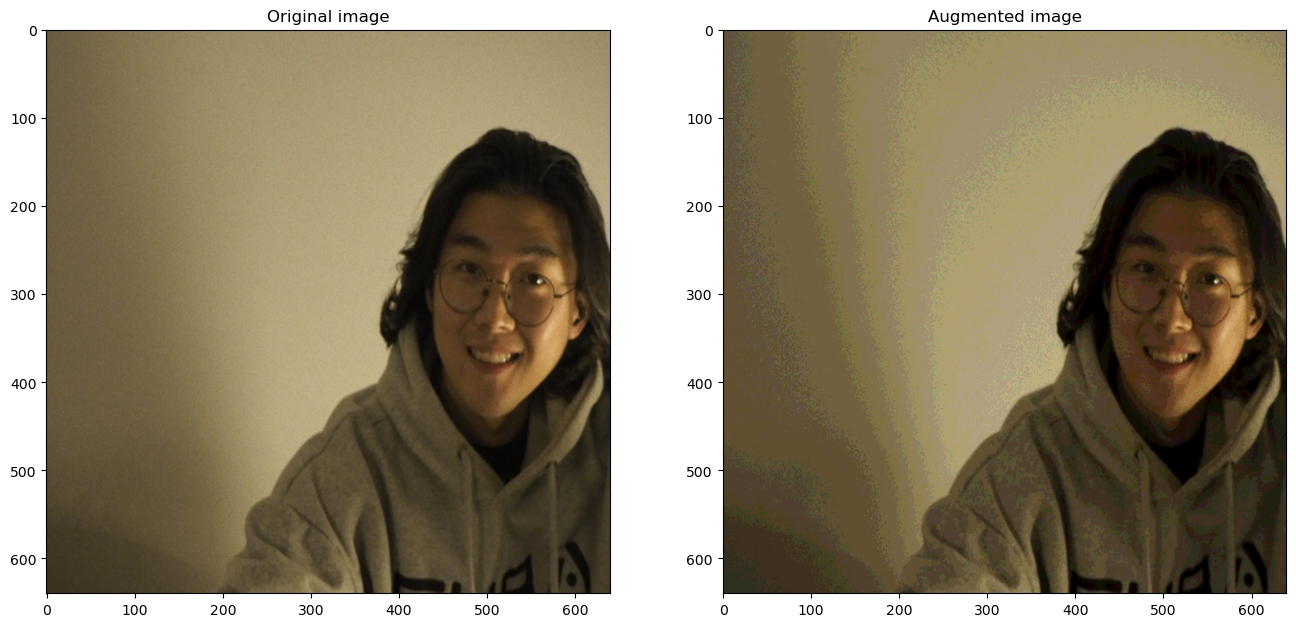

In [11]:
%%time

image = "C:/Users\gunho\PycharmProjects\master_thesis_KUL\image/gunho.png"
image = cv2.imread(image)
image = cv2.resize(image, (640,640))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

T = [
    A.Posterize(num_bits=4.0,p=1.0),
    # A.RandomGamma(gamma_limit=(80, 200),p=1.0)
    # A.RandomBrightnessContrast(p = 1.0)
    # A.Emboss(alpha=(0.2, 0.8), strength=(0.2, 0.8), p=1.0)
    # A.Sharpen(alpha=(0.2, 1), lightness=(0.5, 2),p=1.0)
    # A.CLAHE(clip_limit=4.5,p=1.0)
    # A.GaussNoise(var_limit=(10.0, 200),p=1.0)
    # A.FancyPCA(alpha=0.5,p=1.0),
    # A.FancyPCA(alpha=0.5,p=1.0),
    # A.MultiplicativeNoise(multiplier=(0.9, 1.5),p=1.0)
    # A.CropAndPad(percent=0.2),
    # A.Perspective(scale=0.2,always_apply=True,p=1),
    # A.Affine(translate_percent=-0.3,scale=0.9,rotate=-60,shear=30,p=1.0),
    # A.Cutout(p=1.0),
]
transform = A.Compose(T)

augmented_image = transform(image=image)['image']

visualize_aug(image,augmented_image)

## Robust Random Augmentation

In [12]:
translate_values = np.arange(-0.3, 0.31, 0.01).tolist()
scale_values = np.arange(0.5, 1.01, 0.01).tolist()
rotation_values = list(range(-60, 65, 5))
shear_values = list(range(-30, 32, 2))
per_scale_values = np.arange(0.1, 0.31, 0.01).tolist()
croppad_values = np.arange(-0.2, 0.21, 0.01).tolist()
posterize_values = np.arange(1, 9, 1).tolist()
gamma_values = list(range(120, 201, 1))
brightness_values = np.arange(0.2, 0.41, 0.01).tolist()
contrast_values = np.arange(0.2, 0.41, 0.01).tolist()
alpha_values = np.arange(0.3, 1.00, 0.02).tolist()
strength_values = np.arange(0.3, 1.00, 0.02).tolist()
sharpen_values = np.arange(0.5, 1.00, 0.02).tolist()
lightness_values = np.arange(1.0, 2.00, 0.02).tolist()
clip_values = np.arange(4.0, 7.1, 0.05).tolist()
var_values = list(range(50, 201, 1))
multiplier_values = np.arange(1.1, 1.5, 0.01).tolist()
PCA_alpha_values = np.arange(0.1, 0.51, 0.01).tolist()
holes_values = list(range(8, 17, 1))
height_values = list(range(8, 65, 2)) #
width_values = list(range(8, 65, 2)) #

pca_prob_values = np.arange(0.6,1.1,0.1).tolist()
cutout_prob_values = np.arange(0.1, 0.32, 0.02).tolist()
high_prob_values = np.arange(0.2, 0.4, 0.05).tolist()
mid_prob_values = np.arange(0.1, 0.2, 0.01).tolist()
low_prob_values = np.arange(0.01, 0.1, 0.01).tolist()

n=100 #(the more n the heavier the pipeline becomes)

affine_transform_list = []
for _ in range(n):
    affine_transform_list.append(A.Affine(
        translate_percent=random_value(translate_values),
        scale=random_value(scale_values),
        rotate=random_value(rotation_values),
        shear=random_value(shear_values),
        p=1.0
    ))

perspective_transform_list = []
for _ in range(n):
    perspective_transform_list.append(A.Perspective(scale=(random_value(per_scale_values)), p=1.0))

posterize_transform_list = []
for _ in range(n):
    posterize_transform_list.append(A.Posterize(num_bits= random_value(posterize_values), p=1.0))

gamma_transform_list = []
for _ in range(n):
    gamma_transform_list.append(A.RandomGamma(gamma_limit=(80, random_value(gamma_values)), p=1.0))

brightness_transform_list = []
for _ in range(n):
    brightness_transform_list.append(A.RandomBrightnessContrast(brightness_limit = random_value(brightness_values), contrast_limit = random_value(contrast_values), p=1.0))

emboss_transform_list = []
for _ in range(n):
    emboss_transform_list.append(A.Emboss(alpha=(0.2, random_value(alpha_values)), strength=(0.2, random_value(strength_values)), p=1.0))

sharpen_transform_list = []
for _ in range(n):
    sharpen_transform_list.append(A.Sharpen(alpha=(0.2, random_value(sharpen_values)), lightness=(0.5, random_value(lightness_values)), p=1.0))

clip_transform_list = []
for _ in range(n):
    clip_transform_list.append(A.CLAHE(clip_limit=random_value(clip_values), p=1.0))

var_transform_list = []
for _ in range(n):
    var_transform_list.append(A.GaussNoise(var_limit=(10.0, random_value(var_values)), p=1.0))

pca_transform_list = []
for _ in range(n):
    pca_transform_list.append(A.FancyPCA(alpha=random_value(PCA_alpha_values), p=1.0))

croppad_transform_list = []
for _ in range(n):
    croppad_transform_list.append(A.CropAndPad(percent=random_value(croppad_values), p=1.0))

multiplier_transform_list = []
for _ in range(n):
    multiplier_transform_list.append(A.MultiplicativeNoise(multiplier=(0.9, random_value(multiplier_values)), p=1.0))

cutout_transform_list = []
for _ in range(n):
    cutout_transform_list.append(A.Cutout(num_holes=random_value(holes_values), max_h_size=random_value(height_values), max_w_size=random_value(width_values), p=1.0))

spatial_transform_list = []
for _ in range(n):
    spatial_transform_list.append(A.OneOf([A.OneOf(affine_transform_list, p=1.0),
                                            A.OneOf(croppad_transform_list, p=1.0),
                                            A.OneOf(perspective_transform_list, p=1.0)], p=random_value(high_prob_values)))

pixel_transform_list = []
for _ in range(n):
    pixel_transform_list.append(A.OneOf([A.OneOf(posterize_transform_list, p=random_value(mid_prob_values)),
                                            A.OneOf(gamma_transform_list, p=random_value(mid_prob_values)),
                                            A.OneOf(brightness_transform_list, p=random_value(mid_prob_values)),

                                            A.OneOf(multiplier_transform_list, p = random_value(mid_prob_values)),
                                            A.OneOf(var_transform_list, p=random_value(low_prob_values)),

                                            A.OneOf(emboss_transform_list, p=random_value(mid_prob_values)),
                                            A.OneOf(sharpen_transform_list, p=random_value(mid_prob_values)),
                                            A.OneOf(clip_transform_list, p=random_value(mid_prob_values)),

                                            A.OneOf(cutout_transform_list, p=random_value(cutout_prob_values)),
                                            A.OneOf(pca_transform_list, p=random_value(pca_prob_values))], p=1.0))

pixel_brightness_transform_list = []
for _ in range(n):
    pixel_brightness_transform_list.append(A.OneOf([A.OneOf(posterize_transform_list, p=1.0),
                                                        A.OneOf(gamma_transform_list, p=1.0),
                                                        A.OneOf(brightness_transform_list, p=1.0),

                                                        A.OneOf(multiplier_transform_list, p = 1.0),
                                                        A.OneOf(var_transform_list, p=1.0)], p=random_value(mid_prob_values)))

pixel_edge_transform_list = []
for _ in range(n):
    pixel_edge_transform_list.append(A.OneOf([A.OneOf(emboss_transform_list, p=1.0),
                                                A.OneOf(sharpen_transform_list, p=1.0),
                                                A.OneOf(clip_transform_list, p=1.0),
                                                A.OneOf(pca_transform_list, p=1.0)], p=random_value(mid_prob_values)))

TEST2_transform_list = []
for _ in range(n):
    TEST2_transform_list.append(A.OneOf([A.OneOf(affine_transform_list, p=random_value(high_prob_values)),
                                            A.OneOf(croppad_transform_list, p=random_value(high_prob_values)),
                                            A.OneOf(perspective_transform_list, p=random_value(high_prob_values))], p=1.0)),
    TEST2_transform_list.append(A.OneOf([A.OneOf(posterize_transform_list, p=random_value(high_prob_values)),
                                            A.OneOf(gamma_transform_list, p=random_value(high_prob_values)),
                                            A.OneOf(brightness_transform_list, p=random_value(high_prob_values)),
                                            A.OneOf(multiplier_transform_list, p = random_value(high_prob_values)),
                                            A.OneOf(emboss_transform_list, p=random_value(mid_prob_values)),
                                            A.OneOf(sharpen_transform_list, p=random_value(mid_prob_values)),
                                            A.OneOf(clip_transform_list, p=random_value(mid_prob_values)),
                                            A.OneOf(var_transform_list, p=random_value(low_prob_values)),
                                            A.OneOf(pca_transform_list, p=random_value(pca_prob_values)),
                                            ], p=1.0))

TEST3_transform_list = []
for _ in range(n):
    TEST3_transform_list.append(A.OneOf([A.OneOf(affine_transform_list, p=1.0),
                                            A.OneOf(croppad_transform_list, p=1.0),
                                            A.OneOf(perspective_transform_list, p=1.0)], p=random_value(high_prob_values))),
    TEST3_transform_list.append(A.OneOf([A.OneOf(emboss_transform_list, p=1.0),
                                            A.OneOf(sharpen_transform_list, p=1.0),
                                            A.OneOf(clip_transform_list, p=1.0),
                                            A.OneOf(pca_transform_list, p=1.0)], p=random_value(mid_prob_values))),
    TEST3_transform_list.append(A.OneOf([A.OneOf(posterize_transform_list, p=1.0),
                                            A.OneOf(gamma_transform_list, p=1.0),
                                            A.OneOf(brightness_transform_list, p=1.0),

                                            A.OneOf(multiplier_transform_list, p = 1.0),
                                            A.OneOf(var_transform_list, p=1.0)], p=random_value(mid_prob_values)))


TEST5_transform_list = []
for _ in range(n):
    TEST5_transform_list.append(A.OneOf([A.OneOf(affine_transform_list, p=1.0),
                                            A.OneOf(croppad_transform_list, p=1.0),
                                            A.OneOf(perspective_transform_list, p=1.0)], p=random_value(high_prob_values))),

    TEST5_transform_list.append(A.OneOf([A.OneOf(emboss_transform_list, p=1.0),
                                            A.OneOf(sharpen_transform_list, p=1.0),
                                            A.OneOf(clip_transform_list, p=1.0)], p=random_value(mid_prob_values))),

    TEST5_transform_list.append(A.OneOf([A.OneOf(posterize_transform_list, p=1.0),
                                            A.OneOf(gamma_transform_list, p=1.0),
                                            A.OneOf(brightness_transform_list, p=1.0)], p=random_value(low_prob_values))),

    TEST5_transform_list.append(A.OneOf([A.OneOf(multiplier_transform_list, p = 1.0),
                                            A.OneOf(var_transform_list, p=1.0)], p=random_value(mid_prob_values))),

    TEST5_transform_list.append(A.OneOf([A.OneOf(cutout_transform_list, p=1.0),
                                            A.OneOf(pca_transform_list, p=1.0)], p=random_value(mid_prob_values)))



TEST6_transform_list = []
for _ in range(n):
    TEST6_transform_list.append(A.OneOf([A.OneOf(affine_transform_list, p=1.0),
                                            A.OneOf(croppad_transform_list, p=1.0),
                                            A.OneOf(perspective_transform_list, p=1.0)], p=random_value(high_prob_values))),

    TEST6_transform_list.append(A.OneOf([A.OneOf(posterize_transform_list, p=1.0),
                                            A.OneOf(gamma_transform_list, p=1.0),
                                            A.OneOf(brightness_transform_list, p=1.0),
                                            A.OneOf(multiplier_transform_list, p = 1.0),
                                            A.OneOf(emboss_transform_list, p=1.0),
                                            A.OneOf(sharpen_transform_list, p=1.0),
                                            A.OneOf(clip_transform_list, p=1.0),
                                            A.OneOf(var_transform_list, p=1.0),
                                            A.OneOf(pca_transform_list, p=1.0),
                                            ], p=random_value(mid_prob_values))),

    TEST6_transform_list.append(A.OneOf([A.OneOf(posterize_transform_list, p=1.0),
                                            A.OneOf(gamma_transform_list, p=1.0),
                                            A.OneOf(brightness_transform_list, p=1.0),
                                            A.OneOf(multiplier_transform_list, p = 1.0),
                                            A.OneOf(emboss_transform_list, p=1.0),
                                            A.OneOf(sharpen_transform_list, p=1.0),
                                            A.OneOf(clip_transform_list, p=1.0),
                                            A.OneOf(var_transform_list, p=1.0),
                                            A.OneOf(pca_transform_list, p=1.0),
                                            ], p=random_value(mid_prob_values)))

TEST7_transform_list = []
for _ in range(n):
    TEST7_transform_list.append(A.OneOf([A.OneOf(affine_transform_list, p=1.0),
                                            A.OneOf(croppad_transform_list, p=1.0),
                                            A.OneOf(perspective_transform_list, p=1.0)], p=random_value(high_prob_values))),

    TEST7_transform_list.append(A.OneOf([A.OneOf(affine_transform_list, p=1.0),
                                            A.OneOf(croppad_transform_list, p=1.0),
                                            A.OneOf(perspective_transform_list, p=1.0)], p=random_value(high_prob_values))),

    TEST7_transform_list.append(A.OneOf([A.OneOf(posterize_transform_list, p=1.0),
                                            A.OneOf(gamma_transform_list, p=1.0),
                                            A.OneOf(brightness_transform_list, p=1.0),
                                            A.OneOf(multiplier_transform_list, p = 1.0),
                                            A.OneOf(emboss_transform_list, p=1.0),
                                            A.OneOf(sharpen_transform_list, p=1.0),
                                            A.OneOf(clip_transform_list, p=1.0),
                                            A.OneOf(var_transform_list, p=1.0),
                                            A.OneOf(pca_transform_list, p=1.0),
                                            ], p=random_value(mid_prob_values))),

    TEST7_transform_list.append(A.OneOf([A.OneOf(posterize_transform_list, p=1.0),
                                            A.OneOf(gamma_transform_list, p=1.0),
                                            A.OneOf(brightness_transform_list, p=1.0),
                                            A.OneOf(multiplier_transform_list, p = 1.0),
                                            A.OneOf(emboss_transform_list, p=1.0),
                                            A.OneOf(sharpen_transform_list, p=1.0),
                                            A.OneOf(clip_transform_list, p=1.0),
                                            A.OneOf(var_transform_list, p=1.0),
                                            A.OneOf(pca_transform_list, p=1.0),
                                            ], p=random_value(mid_prob_values)))


random.shuffle(spatial_transform_list)
random.shuffle(pixel_transform_list)
random.shuffle(TEST2_transform_list)
random.shuffle(spatial_transform_list)
random.shuffle(pixel_brightness_transform_list)
random.shuffle(pixel_edge_transform_list)
random.shuffle(TEST3_transform_list)
random.shuffle(TEST5_transform_list)
random.shuffle(TEST6_transform_list)
random.shuffle(TEST7_transform_list)

C:\Users\gunho\anaconda3\envs\KUL_master_thesis\lib\site-packages\albumentations\augmentations\dropout\cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


In [3]:
#Default
T = [
    # PHOTO
    A.OneOf(spatial_transform_list),
    # GEO
    A.OneOf(pixel_transform_list),
    A.OneOf(cutout_transform_list, p=0.15)
]

# # Type II
# T = [
#     # GEO
#     A.OneOf(pixel_transform_list),
#     # PHOTO
#     A.OneOf(spatial_transform_list),
#     A.OneOf(cutout_transform_list, p=0.15)
# ]

# # Type III
# T = [
#     A.OneOf(TEST2_transform_list),
#     A.OneOf(cutout_transform_list, p=0.15)
# ]

# # Type IV
# T = [ # PHOTO - PHOTO - GEO
#     A.OneOf(pixel_transform_list),
#     A.OneOf(pixel_transform_list),
#     A.OneOf(spatial_transform_list),
#     A.OneOf(cutout_transform_list, p=0.15)
# ]

# # Type VI
# T = [ # GEO - PHOTO - PHOTO
#     A.OneOf(spatial_transform_list),
#     A.OneOf(pixel_transform_list),
#     A.OneOf(pixel_transform_list),
#     A.OneOf(cutout_transform_list, p=0.15)
# ]
#
# # Type V
# T = [
#     A.OneOf(TEST5_transform_list)
# ]

# # Type VII
# T = [ # 1 GEO - 2 PHOTO (MIXED)
#     A.OneOf(TEST6_transform_list),
#     A.OneOf(cutout_transform_list, p=0.15)
# ]
#
# # Type VIII
# T = [ # 2 GEO - 2 PHOTO (MIXED)
#     A.OneOf(TEST7_transform_list),
#     A.OneOf(cutout_transform_list, p=0.15)
#
# ]

transform = A.Compose(T, bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))
# A.save(transform, 'C:/Users\gunho\PycharmProjects\KUL_master_thesis/AUG_NEW2.json')

## Offline Augmentation

## Time spent on generating images

In [ ]:
T= A.Compose([
    A.PixelDistributionAdaptation()
])
augmented_image = T(image=image)['image']
visualize(augmented_image)


start = time.time()
for i in range(1000):
    augmented_image = T(image=image)['image']
end = time.time()
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

## Plots

In [9]:
samples_clip = np.random.choice(clip_values, size=100)
samples_rotation = np.random.choice(rotation_values, size=100)
samples_sharpen = np.random.choice(sharpen_values, size=100)

x = np.arange(100)

fig = make_subplots(rows=1, cols=3, subplot_titles=["Clip", "Rotation", "Sharpen"],
                    x_title="samples ID", y_title="value")

fig.add_trace(go.Scatter(x=x, y=samples_clip, mode='markers'), row=1, col=1)
fig.add_trace(go.Scatter(x=x, y=samples_rotation, mode='markers'), row=1, col=2)
fig.add_trace(go.Scatter(x=x, y=samples_sharpen, mode='markers'), row=1, col=3)
fig.update_layout(height=500, width=1500, title_text="", showlegend=False, template= "plotly_white")
fig.show()

# fig.write_image("FIGURES/AUG_samples_w2.png")

In [10]:
df = pd.read_csv('./chart/test_2.csv')
df = df.iloc[:, 1:5]

traces = []

for column in df.columns:
    trace = go.Violin(
        y=df[column],
        name=column,
        box_visible = True,
        meanline_visible = True,
        points='all'
    )
    traces.append(trace)

layout = go.Layout(
    title='Box Plots',
    xaxis=dict(
        title=' ',
        tickmode='linear'
    ),
    yaxis=dict(
        title='Relative performance gain'
    )
)

fig = go.Figure(data=traces, layout=layout)
fig.update_traces(showlegend=False)
fig.update_yaxes(tickformat=".0%")
fig.update_layout(title_text=" ", template = "plotly_white")

fig.show()

#fig.write_image("FIGURES/RF100_violin_w.png")

In [11]:
df = pd.read_csv('./chart/test_2.csv')
df = df[['Size', 'Test 1', 'Test 2', 'Test 3', 'Test 4']]

layout = go.Layout(
    title='Test',
    xaxis=dict(
        title=' ',
        tickmode='linear'
    ),
    yaxis=dict(
        title='Relative performance gain'
    )
)

fig = go.Figure(layout =layout)

fig.add_trace(go.Violin(x=df['Size'],
                        y=df['Test 1'],
                        legendgroup='Yes', scalegroup='No', name='Test 1',
                        side='negative',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x=df['Size'],
                        y=df['Test 2'],
                        legendgroup='No', scalegroup='No', name='Test 2',
                        side='negative',
                        line_color='orange')
             )
fig.add_trace(go.Violin(x=df['Size'],
                        y=df['Test 3'],
                        legendgroup='No', scalegroup='No', name='Test 3',
                        side='positive',
                        line_color='red')
             )
fig.add_trace(go.Violin(x=df['Size'],
                        y=df['Test 4'],
                        legendgroup='No', scalegroup='No', name='Test 4',
                        side='positive',
                        line_color='green')
             )
fig.update_traces(meanline_visible=True,
                  points='all',
                  jitter=0.05)
fig.update_layout(violingap=0, violinmode='overlay',title_text=" ", template = "plotly_white")
fig.update_yaxes(tickformat=".0%")



fig.show()
# fig.write_image("FIGURES/RF100_TEST.png")

In [12]:
# df = pd.read_csv('./chart/test_2.csv')
# fig = px.box(df, x="Category", y="Test 2")
#
# fig.update_layout(title_text=" ", template = "plotly_white")
# fig.update_yaxes(tickformat=".0%")
# fig.show()

In [2]:
df = pd.read_csv('./chart/RRA_test.csv')
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Type'], y=df['mAP'], mode='lines', text = df['mAP'], textposition = 'top center', showlegend=False))
fig.add_trace(go.Scatter(x=df['Type'], y=df['mAP'], mode='markers', marker=dict(size=10), marker_color = "blue", text = df['mAP'], textposition = 'top center', showlegend=False))
fig.update_layout(height=500, width=1000,title_text=" ", template = "plotly_white", yaxis_title='mAP@0.5')


fig.show()
# fig.write_image("FIGURES/RRA_test.png")

In [8]:
df = pd.read_csv('./chart/plastic3.csv')
df = df[df['Data'].isin(['Set 2', 'Set 3', 'Set 4'])]
grouped_df = df.groupby('Data')

fig = make_subplots(rows=1, cols=len(grouped_df), shared_yaxes=True, subplot_titles=tuple(grouped_df.groups.keys()))
fig.update_layout(showlegend=True)

for i, (cat, cat_df) in enumerate(grouped_df):
    fig.add_trace(go.Scatter(x=cat_df['Epochs'], y=cat_df['No AUG'], mode='lines',showlegend = False, line_color="red"), row=1, col=i+1)
    fig.add_trace(go.Scatter(x=cat_df['Epochs'], y=cat_df['Type I'], mode='lines',showlegend = False, line_color="green"), row=1, col=i+1)
    fig.add_trace(go.Scatter(x=cat_df['Epochs'], y=cat_df['Type V'], mode='lines',showlegend = False, line_color="orange"), row=1, col=i+1)
    fig.add_trace(go.Scatter(x=cat_df['Epochs'], y=cat_df['Type VI'], mode='lines',showlegend = False, line_color="blue"), row=1, col=i+1)
    fig.add_trace(go.Scatter(x=cat_df['Epochs'], y=cat_df['Type VII'], mode='lines',showlegend = False, line_color="purple"), row=1, col=i+1)
    fig.add_trace(go.Scatter(x=cat_df['Epochs'], y=cat_df['Type VIII'], mode='lines',showlegend = False, line_color="skyblue"), row=1, col=i+1)

    fig.add_trace(go.Scatter(x=cat_df['Epochs'], y=cat_df['No AUG'], mode='markers', marker=dict(size=5), showlegend=False, marker_color="red", name="check"), row=1, col=i+1)
    fig.add_trace(go.Scatter(x=cat_df['Epochs'], y=cat_df['Type I'], mode='markers', marker=dict(size=5), showlegend=False, marker_color="green"), row=1, col=i+1)
    fig.add_trace(go.Scatter(x=cat_df['Epochs'], y=cat_df['Type V'], mode='markers', marker=dict(size=5), showlegend=False, marker_color="orange"), row=1, col=i+1)
    fig.add_trace(go.Scatter(x=cat_df['Epochs'], y=cat_df['Type VI'], mode='markers', marker=dict(size=5), showlegend=False, marker_color="blue"), row=1, col=i+1)
    fig.add_trace(go.Scatter(x=cat_df['Epochs'], y=cat_df['Type VII'], mode='markers', marker=dict(size=5), showlegend=False, marker_color="purple"), row=1, col=i+1)
    fig.add_trace(go.Scatter(x=cat_df['Epochs'], y=cat_df['Type VIII'], mode='markers', marker=dict(size=5), showlegend=False, marker_color="skyblue"), row=1, col=i+1)

fig.update_xaxes(tickvals=[100, 300, 500])
fig.update_layout(yaxis_title='mAP@.5:.95', template = "plotly_white", height=700, width=1200)

fig.show()
fig.write_image("FIGURES/plastic.png")

In [7]:
df = pd.read_csv('./chart/plastic3.csv')
df = df[df['Data'] == 'Set 1']

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Epochs'], y=df['No AUG'], mode='lines',line_color="red", showlegend=True, name="No AUG"))
fig.add_trace(go.Scatter(x=df['Epochs'], y=df['Type I'], mode='lines',line_color="green", showlegend=True, name="Type I"))
fig.add_trace(go.Scatter(x=df['Epochs'], y=df['Type V'], mode='lines',line_color="orange", showlegend=True, name="Type V"))
fig.add_trace(go.Scatter(x=df['Epochs'], y=df['Type VI'], mode='lines',line_color="blue", showlegend=True, name="Type VI"))
fig.add_trace(go.Scatter(x=df['Epochs'], y=df['Type VII'], mode='lines',line_color="purple", showlegend=True, name="Type VII"))
fig.add_trace(go.Scatter(x=df['Epochs'], y=df['Type VIII'], mode='lines',line_color="skyblue", showlegend=True, name="Type VIII"))

fig.add_trace(go.Scatter(x=df['Epochs'], y=df['No AUG'], mode='markers', marker=dict(size=10), marker_color="red", showlegend=False))
fig.add_trace(go.Scatter(x=df['Epochs'], y=df['Type I'], mode='markers', marker=dict(size=10), marker_color="green",  showlegend=False))
fig.add_trace(go.Scatter(x=df['Epochs'], y=df['Type V'], mode='markers', marker=dict(size=10), marker_color="orange",  showlegend=False))
fig.add_trace(go.Scatter(x=df['Epochs'], y=df['Type VI'], mode='markers', marker=dict(size=10), marker_color="blue",  showlegend=False))
fig.add_trace(go.Scatter(x=df['Epochs'], y=df['Type VII'], mode='markers', marker=dict(size=10), marker_color="purple",  showlegend=False))
fig.add_trace(go.Scatter(x=df['Epochs'], y=df['Type VIII'], mode='markers', marker=dict(size=10), marker_color="skyblue",  showlegend=False))


fig.update_layout(height=500, width=1000,xaxis_title = 'Epoch', yaxis_title='mAP@.5:.95', template = "plotly_white", title= "Set 1", title_x=0.5)

fig.show()
# fig.write_image("FIGURES/Set1.png")

In [41]:
df = pd.read_csv('./chart/OFFLINE.csv')

grouped_df = df.groupby('Data')
fig = make_subplots(rows=1, cols=len(grouped_df), shared_yaxes=True, subplot_titles=tuple(grouped_df.groups.keys()))

for i, (cat, cat_df) in enumerate(grouped_df):
    fig.add_trace(go.Scatter(x=cat_df['Epochs'], y=cat_df['No AUG'], mode='lines',line_color="skyblue", showlegend=True, name="No AUG"), row=1, col=i+1)
    fig.add_trace(go.Scatter(x=cat_df['Epochs'], y=cat_df['No AUG'], mode='markers', marker=dict(size=10), marker_color="skyblue", showlegend=False), row=1, col=i+1)

    fig.add_trace(go.Scatter(x=cat_df['Epochs'], y=cat_df['Type I'], mode='lines',line_color="orange", showlegend=True, name="Type I"), row=1, col=i+1)
    fig.add_trace(go.Scatter(x=cat_df['Epochs'], y=cat_df['Type I'], mode='markers', marker=dict(size=10), marker_color="orange", showlegend=False), row=1, col=i+1)


fig.update_layout(showlegend=True)
fig.update_xaxes(tickvals=[50, 100, 300])
# fig.update_yaxes(tickvals=[0.1, 0.2, 0.3, 0.4, 0.45])
fig.update_layout(height=500, width=700,xaxis_title = 'Epoch', yaxis_title='mAP@.5:.95', template = "plotly_white", title_x=0.5)
fig.show()
fig.write_image("FIGURES/Offline.png")

In [21]:
df = pd.read_csv('./chart/Epochs/EPOCHS_100.csv')
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['EPOCH'], y=df['no aug'], mode='lines',line_color="red", showlegend=True, name="No AUG"))
fig.add_trace(go.Scatter(x=df['EPOCH'], y=df['Type 1'], mode='lines',line_color="blue", showlegend=True, name="Type 1"))
fig.add_trace(go.Scatter(x=df['EPOCH'], y=df['Type 5'], mode='lines',line_color="green", showlegend=True, name="Type 5"))
fig.add_trace(go.Scatter(x=df['EPOCH'], y=df['Type 7'], mode='lines',line_color="purple", showlegend=True, name="Type 7"))


fig.update_layout(height=500, width=1500,xaxis_title = 'Epoch', yaxis_title='mAP@.5:.95', template = "plotly_white")

fig.show()
# fig.write_image("FIGURES/EPOCHS_training.png")

In [19]:
df = pd.read_csv('./chart/Epochs/EPOCHS_300.csv')
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['EPOCH'], y=df['no aug'], mode='lines',line_color="red", showlegend=True, name="No AUG"))
fig.add_trace(go.Scatter(x=df['EPOCH'], y=df['Type 1'], mode='lines',line_color="blue", showlegend=True, name="Type 1"))
fig.add_trace(go.Scatter(x=df['EPOCH'], y=df['Type 5'], mode='lines',line_color="green", showlegend=True, name="Type 5"))
fig.add_trace(go.Scatter(x=df['EPOCH'], y=df['Type 7'], mode='lines',line_color="purple", showlegend=True, name="Type 7"))


fig.update_layout(height=500, width=1500,xaxis_title = 'Epoch', yaxis_title='mAP@.5:.95', template = "plotly_white")

fig.show()
# fig.write_image("FIGURES/EPOCHS_training_300.png")

In [14]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

# create sample data
df = pd.read_csv('./chart/thesis_experiment1.csv')
grouped_df = df.groupby('Data')

color_map = {'NO AUG': 'red', 'YOLOv5 Low': 'green', 'YOLOv5 High': 'orange', 'RRA': 'blue'}
colors = df['pipeline'].map(color_map)

fig = make_subplots(rows=1, cols=len(grouped_df), shared_yaxes=False, subplot_titles=tuple(grouped_df.groups.keys()))
fig.update_layout(showlegend=True)

for i, (cat, cat_df) in enumerate(grouped_df):
    fig.add_trace(go.Scatter(x=cat_df['Training time'], y=cat_df['mAP'], mode='markers', marker=dict(color=colors[df['pipeline'] == 'NO AUG']), showlegend=False), row=1, col=i+1)
    fig.add_trace(go.Scatter(x=cat_df['Training time'], y=cat_df['mAP'], mode='markers', marker=dict(color=colors[df['pipeline'] == 'YOLOv5 Low']), showlegend=False), row=1, col=i+1)
    fig.add_trace(go.Scatter(x=cat_df['Training time'], y=cat_df['mAP'], mode='markers', marker=dict(color=colors[df['pipeline'] == 'YOLOv5 High']), showlegend=False), row=1, col=i+1)
    fig.add_trace(go.Scatter(x=cat_df['Training time'], y=cat_df['mAP'], mode='markers', marker=dict(color=colors[df['pipeline'] == 'RRA']), showlegend=False), row=1, col=i+1)

fig.update_layout(yaxis_title='mAP@.5', template = "plotly_white",height=500, width=1500)

fig.show()
# fig.write_image("FIGURES/training_time.png")

## Offline augmentation

In [10]:
# Directory setting
folder_images = "C:/Users\gunho\OneDrive\Desktop\Master\Master Thesis\data\Cegeka_problem/0_SELF-MASTER/NEW\Cegeka_s4_set4/Cegeka_OFFLINE/train\images"
folder_labels = "C:/Users\gunho\OneDrive\Desktop\Master\Master Thesis\data\Cegeka_problem/0_SELF-MASTER/NEW\Cegeka_s4_set4/Cegeka_OFFLINE/train\labels"
output_folder = './augmented'

# Get the files
image_files = [file for file in os.listdir(folder_images) if file.endswith('.jpg')]

for image_file in image_files:
    image_path = os.path.join(folder_images, image_file)
    image = cv2.imread(image_path)

    label_file = os.path.splitext(image_file)[0] + '.txt'
    label_path = os.path.join(folder_labels, label_file)
    with open(label_path, 'r') as f:
        label_data = f.read().strip().split('\n')

    bboxes = []
    labels = []
    for line in label_data:
        class_label, x, y, w, h = line.split()

        x = float(x)
        y = float(y)
        w = float(w)
        h = float(h)

        bboxes.append([x, y, w, h])
        labels.append(int(class_label))

    bboxes = np.array(bboxes)
    augmented = transform(image=image, bboxes=bboxes, class_labels=class_label)

    augmented_image = augmented['image']
    augmented_bboxes = augmented['bboxes']
    augmented_labels = augmented['class_labels']

    augmented_image_path = os.path.join("C:/Users\gunho\OneDrive\Desktop\Master\Master Thesis\data\Cegeka_problem/0_SELF-MASTER/NEW\Cegeka_s4_set4/augmented_Type1\images", os.path.splitext(image_file)[0] + "_10.jpg")
    cv2.imwrite(augmented_image_path, augmented_image)

    augmented_label_file = os.path.join('C:/Users\gunho\OneDrive\Desktop\Master\Master Thesis\data\Cegeka_problem/0_SELF-MASTER/NEW\Cegeka_s4_set4/augmented_Type1\labels', os.path.splitext(label_file)[0] + "_10.txt")
    with open(augmented_label_file, 'w') as f:
        for bbox, label in zip(augmented_bboxes, augmented_labels):
            x, y, w, h = bbox
            f.write(f"{class_label} {x} {y} {w} {h}\n")